<a href="https://colab.research.google.com/github/sky-m1618/PROJECT_1/blob/main/P3_Image_to_cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [8]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    # plt.axes('off')
    plt.show()
    return img


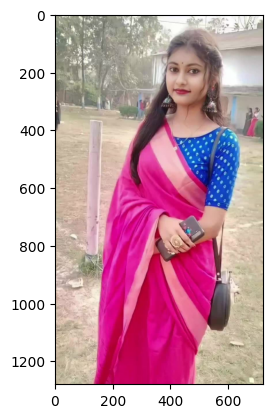

In [49]:
file = read_file('girl.jpg')

#Create Edge Mask

In [50]:
def edge_mask(img,line_size , blur_value):
    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray , blur_value)

    edges = cv2.adaptiveThreshold(gray_blur , 255 ,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY , line_size,blur_value)

    return edges

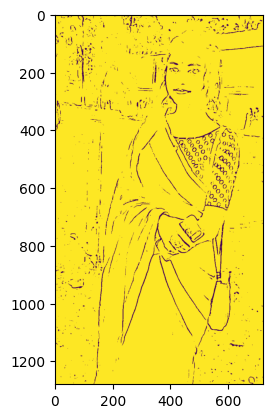

In [51]:
edge_file = edge_mask(file , 7,7)
plt.imshow(edge_file)
plt.show()


In [52]:
def color_quantization(img , k):
    data = np.float32(img).reshape((-1,3))

    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    ret , label , center = cv2.kmeans(data , k , None , criteria , 10 , cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result


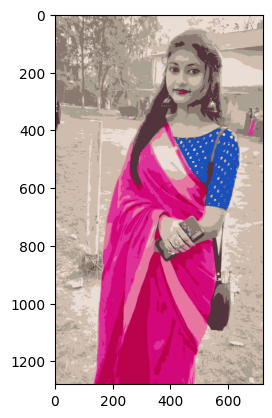

In [53]:

reduced_color_image = color_quantization(file , 10)
plt.imshow(reduced_color_image)
plt.show()


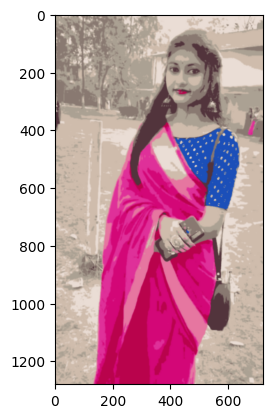

In [54]:
from cv2.detail import BundleAdjusterReproj
blurred = cv2.bilateralFilter(reduced_color_image , d = 7 , sigmaColor=200 , sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [55]:
def cartoon():
    c = cv2.bitwise_and(blurred,blurred,mask = edge_file)

    plt.imshow(c)
    plt.show()


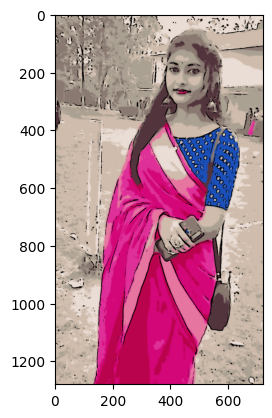

In [56]:
cartoon()

In [46]:
def convert_Image(filename , line_size,blur_value , nOF_color):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    file = edge_mask(img , line_size , blur_value)
    img = color_quantization(img,nOF_color)
    blurred = cv2.bilateralFilter(img , d = 7 , sigmaColor=200 , sigmaSpace=200)
    img = cv2.bitwise_and(blurred,blurred,mask = file)
    plt.imshow(filename)
    plt.title('Original')
    plt.show()

    plt.imshow(img)
    plt.title('Cartoon Image')
    plt.show()


